In [12]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

# Load dataset
df = pd.read_csv("/Users/pavandeekshith/B-Tech/Btech_3rd_Year/6th_Sem/Geospatial_clustering/ML Assignment Dataset.csv")  # Replace with actual file name

# Display basic info
display("Dataset Info:")
display(df.info())

# Display first few rows
display(df.head())


'Dataset Info:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9895 entries, 0 to 9894
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Longitude;Latitude  9895 non-null   object
dtypes: object(1)
memory usage: 77.4+ KB


None

,Longitude;Latitude
0,36.861544;-5.177747
1,51.463766;5.392935
2,51.190492;4.453765
3,51.326247;6.085953
4,51.463766;5.392935


In [14]:
display("Missing Values:")
display(df.isnull().sum())

'Missing Values:'

Longitude;Latitude    0
dtype: int64

In [15]:
display("Duplicate Rows:")
display(df.duplicated().sum())

'Duplicate Rows:'

3965

In [16]:
df = df.drop_duplicates()
# df_new = df 
# df_new.to_csv('ML_Assignment_Dataset_mod.csv', index=False)
print(df.columns)


Index(['Longitude;Latitude'], dtype='object')


In [ ]:
# Splitting the column into two separate columns
df[['longitude', 'latitude']] = df['Longitude;Latitude'].str.split(';', expand=True).astype(float)

df = df.drop(columns=['Longitude;Latitude'])

print(df.head())
df_new = df 
df_new.to_csv('ML_Assignment_Dataset_mod.csv', index=False)

   longitude  latitude
0  36.861544 -5.177747
1  51.463766  5.392935
2  51.190492  4.453765
3  51.326247  6.085953
6  54.529777  9.029133


In [18]:
z_scores = np.abs((df[['latitude', 'longitude']] - df[['latitude', 'longitude']].mean()) / df[['latitude', 'longitude']].std())
outliers = (z_scores > 3).any(axis=1)
display(f"Number of Outliers: {outliers.sum()}")

'Number of Outliers: 52'

In [19]:
df = df[~outliers]

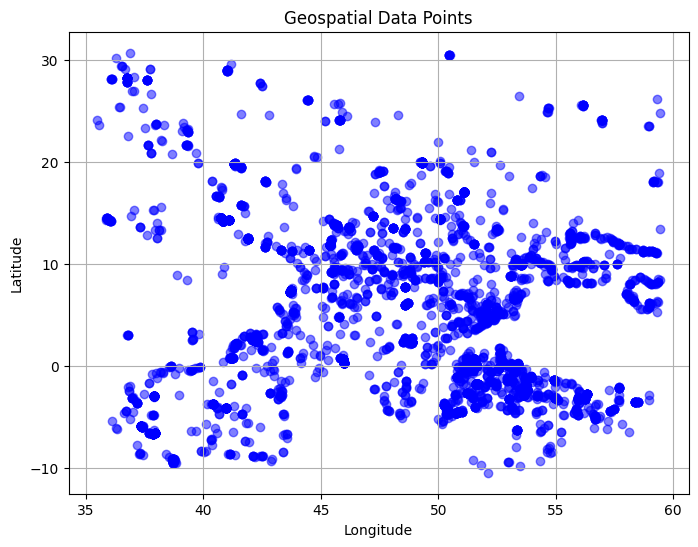

"Map saved as 'map.html'. Open in a browser to view."

,longitude,latitude
0,36.861544,-5.177747
1,51.463766,5.392935
2,51.190492,4.453765
3,51.326247,6.085953
6,54.529777,9.029133


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c='blue')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Data Points")
plt.grid()
plt.show()

# Create a folium map
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

# Add points to the map
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color="blue",
        fill=True,
        fill_color="blue"
    ).add_to(m)

# Save and display the map
m.save("map.html")
display("Map saved as 'map.html'. Open in a browser to view.")

### Since K-Means relies on Euclidean distance, standardizing latitude/longitude ensures equal contribution to clustering.

###  Standardization (Z-score Normalization) 
- Used in distance-based ML models (e.g., K-Means, PCA, SVM, Linear Regression).

/var/folders/1h/mqtvs8qd6kbfjkgs026sd7640000gn/T/ipykernel_22679/622241971.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['latitude', 'longitude']] = scaler.fit_transform(df[['latitude', 'longitude']])


'Normalized Data Sample:'

,longitude,latitude
0,-2.157452,-1.183107
1,0.443153,0.089294
2,0.394484,-0.023754
3,0.418661,0.172713
6,0.989199,0.526986


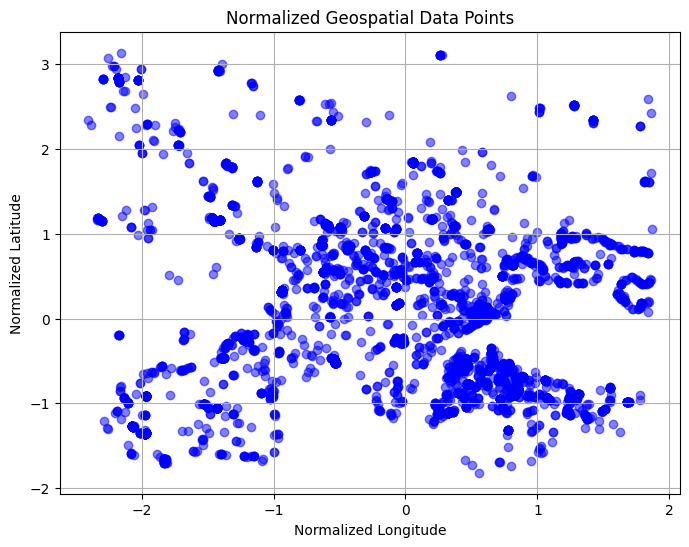

"Map saved as 'map.html'. Open in a browser to view."

In [ ]:
from sklearn.preprocessing import StandardScaler

## Here we are standardizing the data(Z-score standardization)
scaler = StandardScaler()
df[['latitude', 'longitude']] = scaler.fit_transform(df[['latitude', 'longitude']])

display("Normalized Data Sample:")
display(df.head())

# Scatter plot using Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c='blue')
plt.xlabel("Normalized Longitude")
plt.ylabel("Normalized Latitude")
plt.title("Normalized Geospatial Data Points")
plt.grid()
plt.show()

# Create a folium map
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

# Add points to the map
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color="blue",
        fill=True,
        fill_color="blue"
    ).add_to(m)

# Save and display the map
m.save("map.html")
display("Map saved as 'map.html'. Open in a browser to view.")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/1h/mqtvs8qd6kbfjkgs026sd7640000gn/T/ipykernel_22679/3534144175.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kmeans_cluster'] = kmeans.fit_predict(X)
/var/folders/1h/mqtvs8qd6kbfjkgs026sd7640000gn/T/ipykernel_22679/3534144175.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

'Silhouette Scores:'

{'K-Means': 0.5275620279047598,
 'DBSCAN': 0.0612582733272601,
 'Agglomerative': 0.4320237329161816,
 'GMM': 0.47370911245340525}

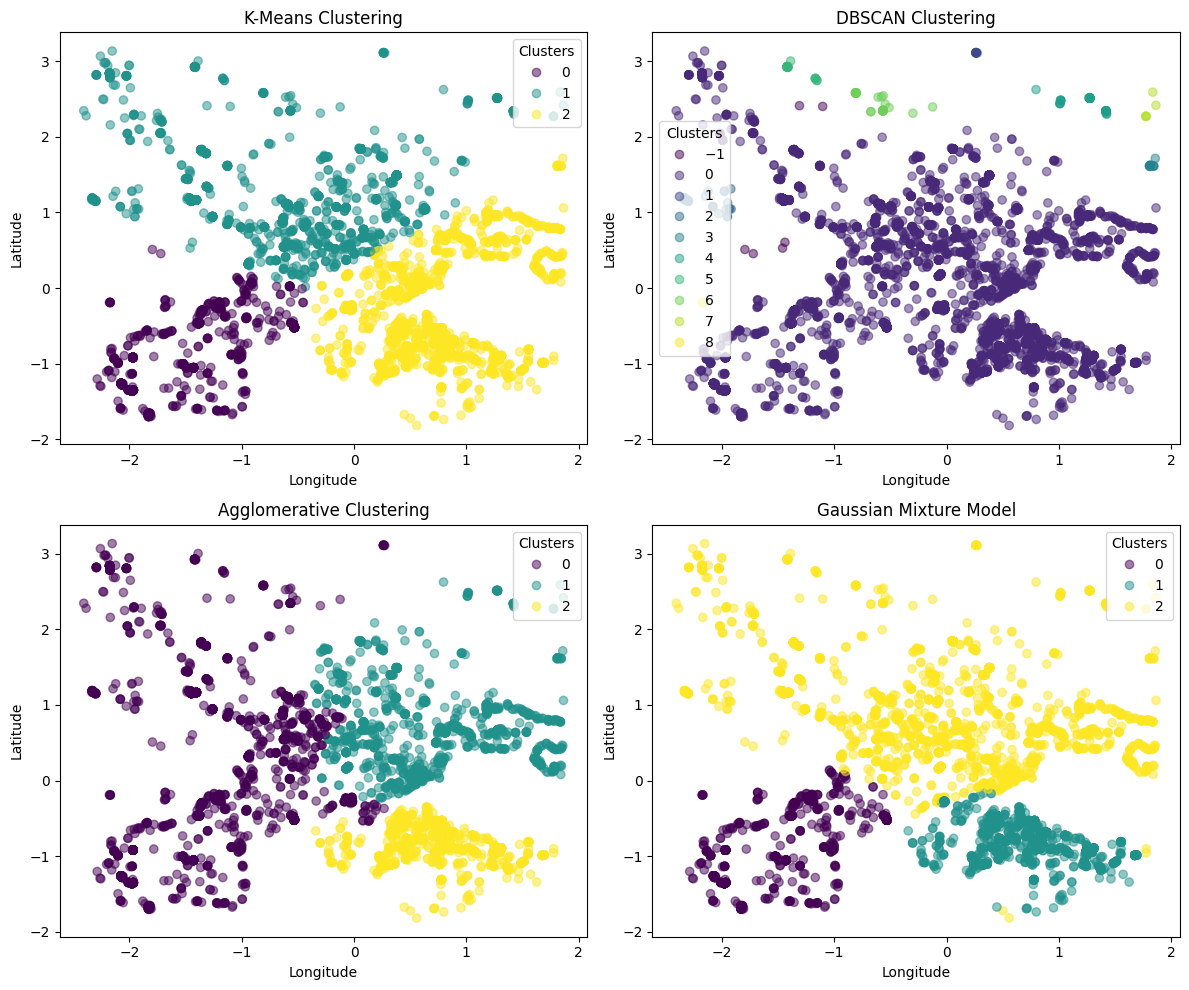

In [23]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
# Implement Clustering Models
X = df[['latitude', 'longitude']]

# 1. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X)

# 2. DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X)

# 3. Agglomerative Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=3)
df['agglo_cluster'] = agglo.fit_predict(X)

# 4. Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
df['gmm_cluster'] = gmm.fit_predict(X)

# Evaluate Clustering Performance
silhouette_scores = {
    "K-Means": silhouette_score(X, df['kmeans_cluster']),
    "DBSCAN": silhouette_score(X, df['dbscan_cluster']) if len(set(df['dbscan_cluster'])) > 1 else None,
    "Agglomerative": silhouette_score(X, df['agglo_cluster']),
    "GMM": silhouette_score(X, df['gmm_cluster'])
}
display("Silhouette Scores:")
display(silhouette_scores)

# Visualize Clustering Results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
clusters = ['kmeans_cluster', 'dbscan_cluster', 'agglo_cluster', 'gmm_cluster']
titles = ['K-Means Clustering', 'DBSCAN Clustering', 'Agglomerative Clustering', 'Gaussian Mixture Model']

for ax, cluster, title in zip(axes.flatten(), clusters, titles):
    scatter = ax.scatter(df['longitude'], df['latitude'], c=df[cluster], cmap='viridis', alpha=0.5)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(title)
    ax.legend(*scatter.legend_elements(), title="Clusters")

plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

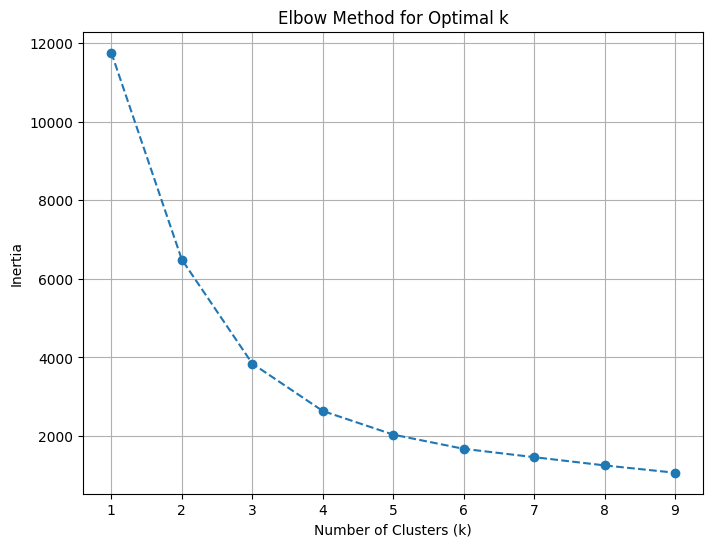

In [24]:
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['latitude', 'longitude']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

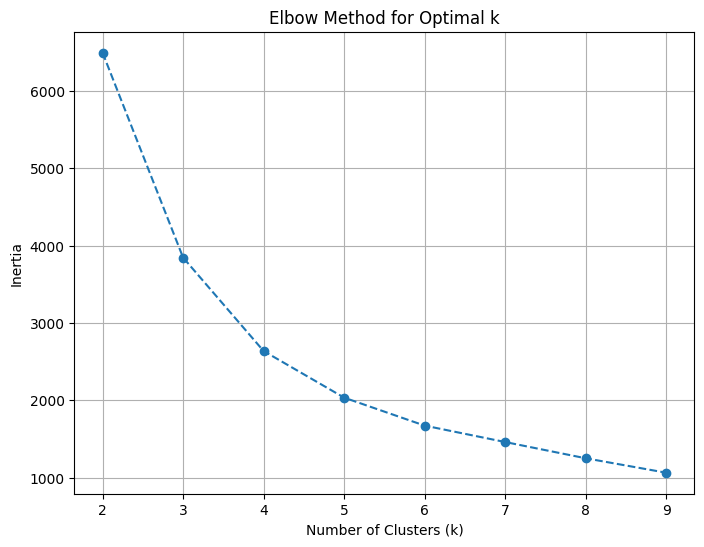

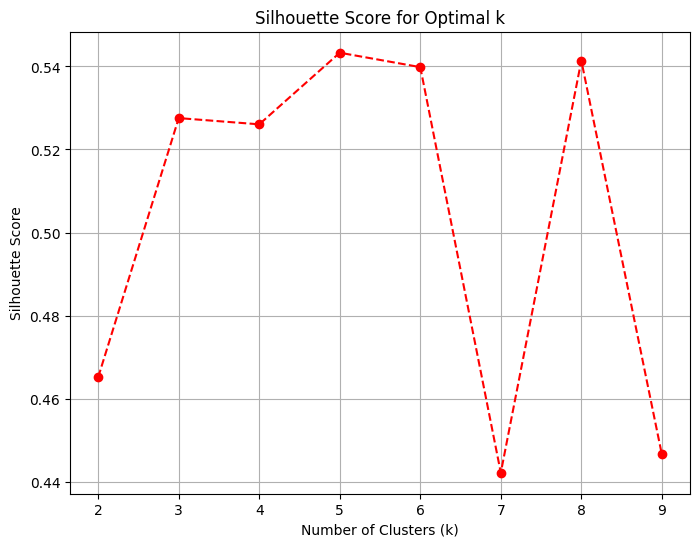

Optimal number of clusters: 5


In [25]:
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters using Elbow Method & Silhouette Score
inertia = []
silhouette_scores = []
k_values = range(2, 10)  # Start from 2 because silhouette score is not valid for k=1

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df[['latitude', 'longitude']])
    
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df[['latitude', 'longitude']], labels))

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid()
plt.show()

# Select best k based on highest silhouette score
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {best_k}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


'Silhouette Scores:'

{'K-Means': 0.5275620279047598,
 'DBSCAN': 0.0612582733272601,
 'Agglomerative': 0.4320237329161816,
 'GMM': 0.47370911245340525}

'Davies-Bouldin Scores:'

{'K-Means': 0.7018657153010089,
 'DBSCAN': 0.7679128984233172,
 'Agglomerative': 0.9322476882152211,
 'GMM': 0.7646168979154274}

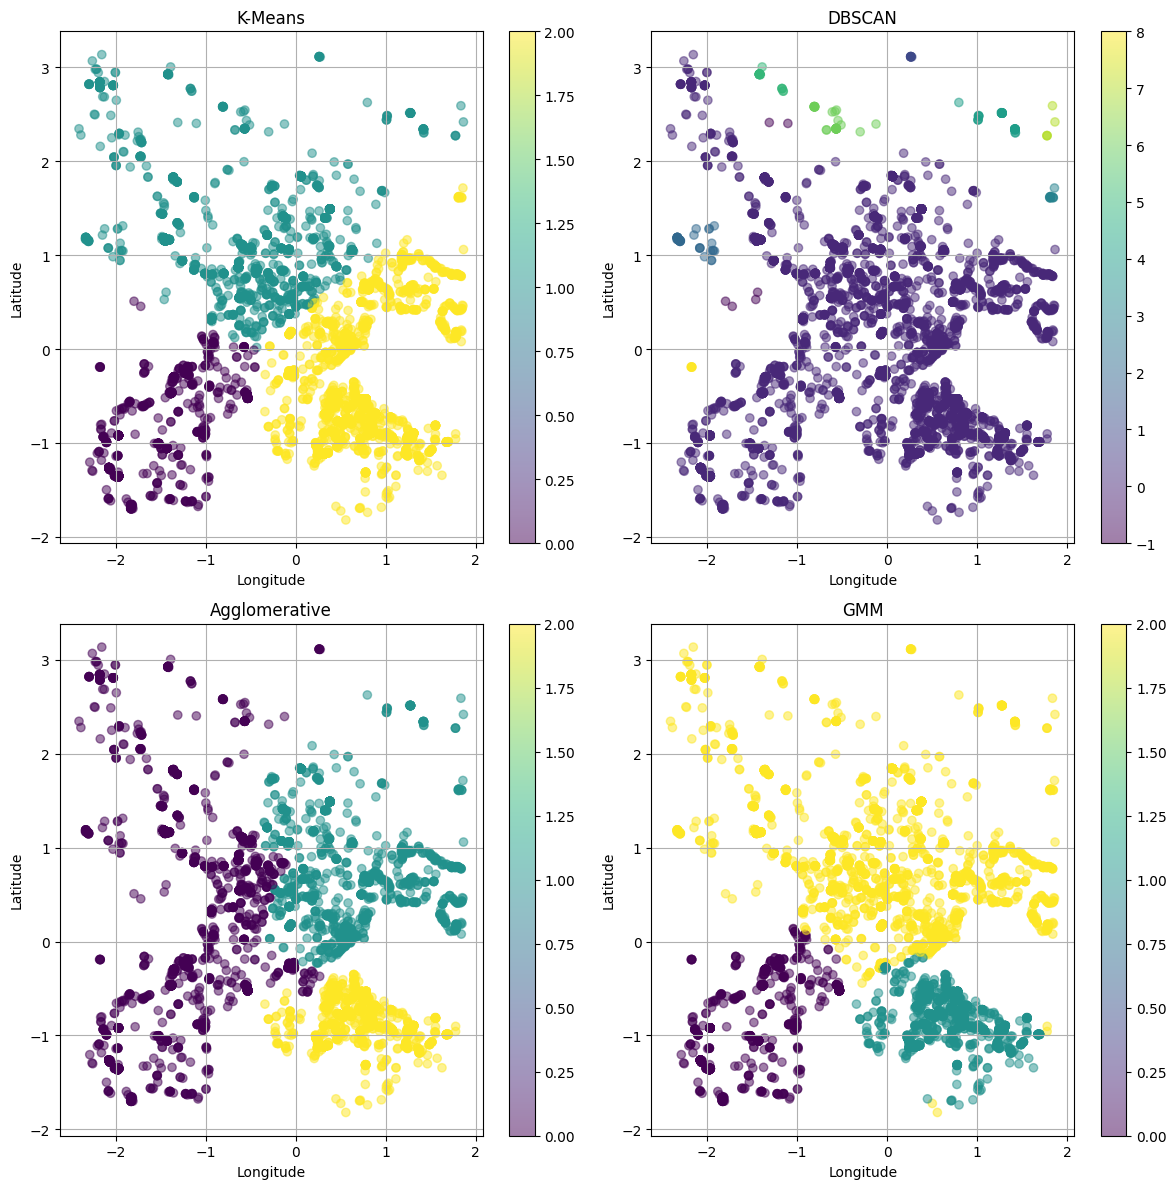

In [31]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
best_k = 3  # Choose optimal k from Elbow Method

# K-Means
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df[['latitude', 'longitude']])

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(df[['latitude', 'longitude']])

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=best_k)
agglo_labels = agglo.fit_predict(df[['latitude', 'longitude']])

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=best_k, random_state=42)
gmm_labels = gmm.fit_predict(df[['latitude', 'longitude']])

# Evaluate clustering performance
silhouette_scores = {
    "K-Means": silhouette_score(df[['latitude', 'longitude']], kmeans_labels),
    "DBSCAN": silhouette_score(df[['latitude', 'longitude']], dbscan_labels) if len(set(dbscan_labels)) > 1 else -1,
    "Agglomerative": silhouette_score(df[['latitude', 'longitude']], agglo_labels),
    "GMM": silhouette_score(df[['latitude', 'longitude']], gmm_labels)
}

davies_bouldin_scores = {
    "K-Means": davies_bouldin_score(df[['latitude', 'longitude']], kmeans_labels),
    "DBSCAN": davies_bouldin_score(df[['latitude', 'longitude']], dbscan_labels) if len(set(dbscan_labels)) > 1 else -1,
    "Agglomerative": davies_bouldin_score(df[['latitude', 'longitude']], agglo_labels),
    "GMM": davies_bouldin_score(df[['latitude', 'longitude']], gmm_labels)
}

display("Silhouette Scores:", silhouette_scores)
display("Davies-Bouldin Scores:", davies_bouldin_scores)

# Visualize clusters
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
algorithms = [(kmeans_labels, "K-Means"), (dbscan_labels, "DBSCAN"), 
              (agglo_labels, "Agglomerative"), (gmm_labels, "GMM")]

for ax, (labels, title) in zip(axes.flatten(), algorithms):
    scatter = ax.scatter(df['longitude'], df['latitude'], c=labels, cmap='viridis', alpha=0.5)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(title)
    ax.grid()
    plt.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


'Silhouette Scores:'

{'K-Means': 0.5260599619365224,
 'DBSCAN': 0.0612582733272601,
 'Agglomerative': 0.4755401231344096,
 'GMM': 0.48556633161266244}

'Davies-Bouldin Scores:'

{'K-Means': 0.7843295627423938,
 'DBSCAN': 0.7679128984233172,
 'Agglomerative': 0.8329341673797398,
 'GMM': 0.9139685090533186}

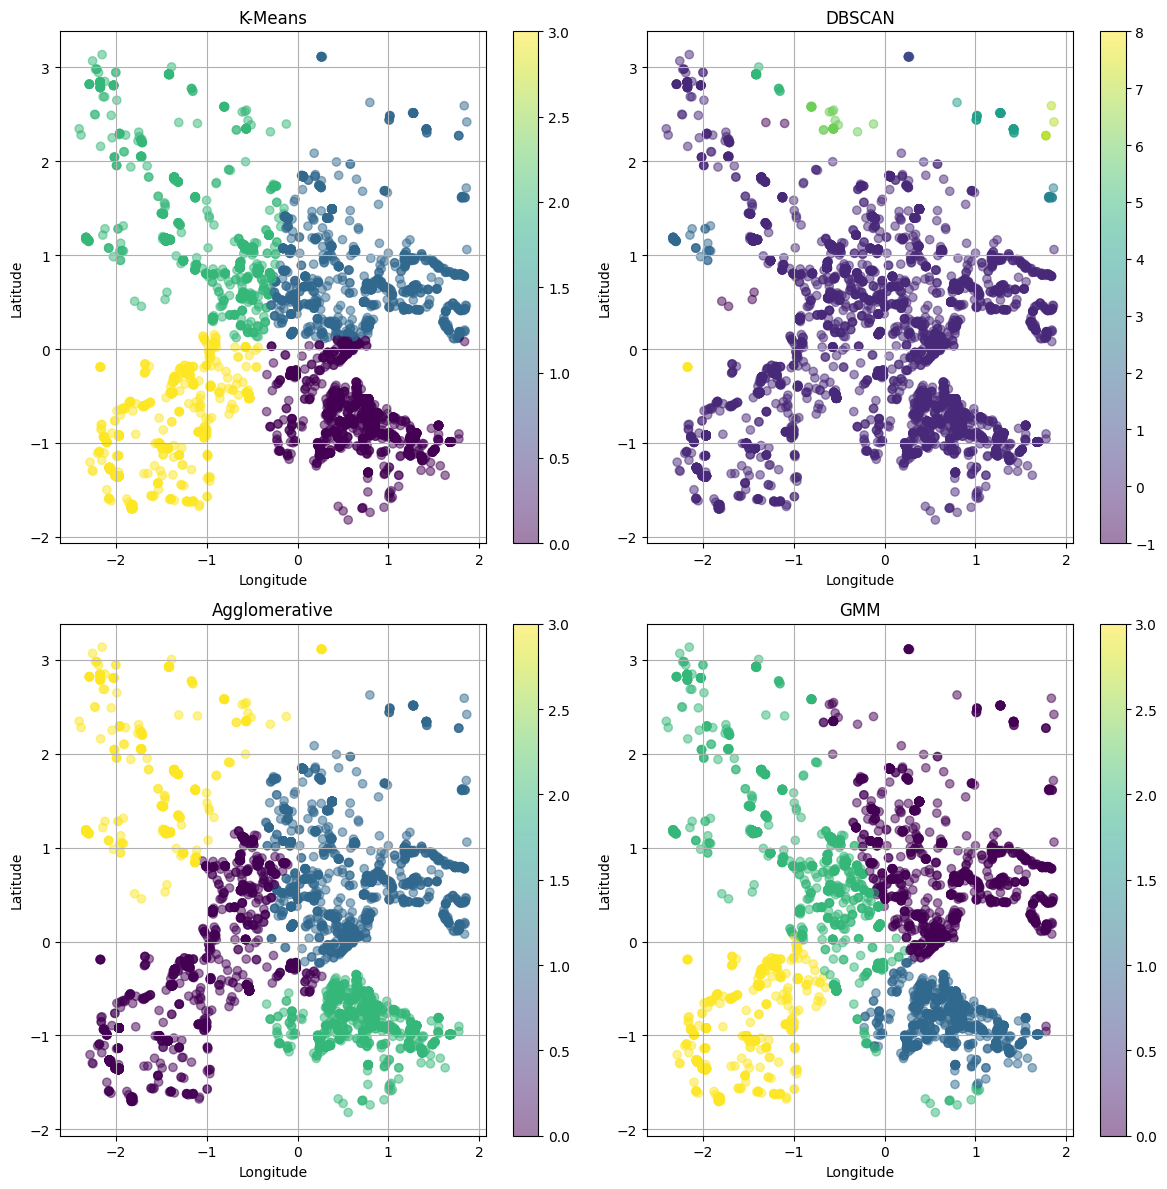

In [32]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
best_k = 4  # Choose optimal k from Elbow Method

# K-Means
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df[['latitude', 'longitude']])

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(df[['latitude', 'longitude']])

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=best_k)
agglo_labels = agglo.fit_predict(df[['latitude', 'longitude']])

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=best_k, random_state=42)
gmm_labels = gmm.fit_predict(df[['latitude', 'longitude']])

# Evaluate clustering performance
silhouette_scores = {
    "K-Means": silhouette_score(df[['latitude', 'longitude']], kmeans_labels),
    "DBSCAN": silhouette_score(df[['latitude', 'longitude']], dbscan_labels) if len(set(dbscan_labels)) > 1 else -1,
    "Agglomerative": silhouette_score(df[['latitude', 'longitude']], agglo_labels),
    "GMM": silhouette_score(df[['latitude', 'longitude']], gmm_labels)
}

davies_bouldin_scores = {
    "K-Means": davies_bouldin_score(df[['latitude', 'longitude']], kmeans_labels),
    "DBSCAN": davies_bouldin_score(df[['latitude', 'longitude']], dbscan_labels) if len(set(dbscan_labels)) > 1 else -1,
    "Agglomerative": davies_bouldin_score(df[['latitude', 'longitude']], agglo_labels),
    "GMM": davies_bouldin_score(df[['latitude', 'longitude']], gmm_labels)
}

display("Silhouette Scores:", silhouette_scores)
display("Davies-Bouldin Scores:", davies_bouldin_scores)

# Visualize clusters
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
algorithms = [(kmeans_labels, "K-Means"), (dbscan_labels, "DBSCAN"), 
              (agglo_labels, "Agglomerative"), (gmm_labels, "GMM")]

for ax, (labels, title) in zip(axes.flatten(), algorithms):
    scatter = ax.scatter(df['longitude'], df['latitude'], c=labels, cmap='viridis', alpha=0.5)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(title)
    ax.grid()
    plt.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()
